In [13]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
from sb3_contrib import RecurrentPPO

In [15]:
BASE_PATH = '../../output_models_initial'
BASE_PATH2 = '../../initial_model'
BASE_PATH3 = '../../best_model'

In [16]:
# model = RecurrentPPO.load(f'{BASE_PATH}/recurrentppo/MlpLstmPolicy/.best_model.zip.icloud')
# model = RecurrentPPO.load(f'{BASE_PATH2}/best_models/recurrentppo_MlpLstmPolicy')
# model = RecurrentPPO.load(f'{BASE_PATH3}/best_models/recurrentppo_MlpLstmPolicy')
# model = RecurrentPPO.load('../output_models/recurrentppo/MlpLstmPolicy/2022-06-21_16_35_30_5.zip')

#X = np.load(f'{BASE_PATH2}/recurrentppo/MlpLstmPolicy/observations.npy')
#TODO last
#X = np.load(rf'C:\initial_model\ppo\MlpPolicy\observations_recurrentppo_MlpLstmPolicy_1.npy')
# X = np.load(f'{BASE_PATH2}/observations/observations_recurrentppo_MlpLstmPolicy_1.npy')
#X = np.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\observations_recurrentppo_MlpLstmPolicy_1.npy')
X=np.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_64_64\observations_recurrentppo_MlpLstmPolicy_1.npy')
#X=np.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_256\observations_recurrentppo_MlpLstmPolicy_1.npy')
#X=np.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_256_10_000\observations_recurrentppo_MlpLstmPolicy_1.npy')
#X = np.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_256_100_000\observations_recurrentppo_MlpLstmPolicy_1.npy')
X = torch.Tensor(X)
X.shape

torch.Size([2410, 1, 7])

In [17]:
#model = RecurrentPPO.load(r'C:\initial_model\recurrentppo\MlpLstmPolicy\recurrentppo_MlpLstmPolicy_mlplstm_600_000_speedup')
#model = RecurrentPPO.load(r"C:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\recurrentppo_MlpLstmPolicy_mlplstm_all_metrics")
model = RecurrentPPO.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_64_64\recurrentppo_MlpLstmPolicy_mlplstm_full_model.zip')
#model = RecurrentPPO.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_256\recurrentppo_MlpLstmPolicy_mlplstm_full_model_256.zip')
#model = RecurrentPPO.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_256_100_000\ppo_mlp_intermediate_00_100000.zip')
#model = RecurrentPPO.load(r'c:\initial_model\historic_synthetic_dnnevo\RANDOM\BASELINE\arch_256_10_000\recurrentppo_MlpLstmPolicy_mlplstm_10_000.zip')

In [21]:
sys.path.append(os.getcwd()+'/../../')

from driver.common.cmd_util import (
    common_arg_parser,
    parse_unknown_args
)
import sys
from run import configure_logger, parse_cmdline_kwargs
# pretend these were typed on the command line
#TEST-DNNEVO-2.swf
argv = """
  --env ThreeSizeAppEnv-v1 --policy MlpLstmPolicy --algo RecurrentPPO --num_timesteps 2_000 --pretraining_timesteps 2_000 --tensorboard_log '.' --workload_file TEST-DNNEVO-2.swf
""".split()
arg_parser = common_arg_parser()
args, unknown_args = arg_parser.parse_known_args(argv)
configure_logger(args.log_path, format_strs=['stdout', 'log', 'csv'])
extra_args = parse_cmdline_kwargs(unknown_args)
#extra_args['use_random_wrapper']=True
from run import build_env
#args.observation_history_length = 8
args.queue_wait_penalty=0.0005
args.initial_vm_count=1
args.mips_per_core=4400
env = build_env(args, extra_args)

ImportError: cannot import name 'FEATURE_NAMES' from 'utils' (c:\Users\ultramarine\Desktop\ppo_magisterka\trainloop_driver_official\trainloop_driver_final\trainloop-driver\analysis\initial_training/../src\utils.py)

In [ ]:
import numpy as np
import gym
from stable_baselines3 import PPO
from sklearn.decomposition import SparsePCA
from collections import defaultdict

def collect_observations(model, env, n_episodes=100):
    """
    Collect observations from trained PPO model.
    
    Args:
        model: Trained SB3 PPO model
        env: Gym environment
        n_episodes: Number of episodes to collect
    
    Returns:
        np.array: All observations collected (n_timesteps, n_features)
    """
    all_observations = []
    
    for episode in range(n_episodes):
        obs = env.reset()
        done = False
        episode_obs = []
        
        while not done:
            episode_obs.append(obs)
            
            # Get action from trained policy
            action, _states = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
        
        all_observations.extend(episode_obs)
        
        if (episode + 1) % 10 == 0:
            print(f"Collected {episode + 1}/{n_episodes} episodes, "
                  f"total timesteps: {len(all_observations)}")
    
    return np.array(all_observations)

In [6]:
predictions = []
for _ in X:
    #predictions.append(model.predict(X[0])[0][0])
    predictions.append(model.predict(_)[0][0])

predictions = np.array(predictions)

In [22]:
# predictions = np.squeeze(np.load(f'{BASE_PATH2}/recurrentppo/MlpLstmPolicy/actions.npy'), axis=1)
predictions = np.squeeze(np.load(f'{BASE_PATH2}/actions/actions_recurrentppo_MlpLstmPolicy.npy'), axis=1)

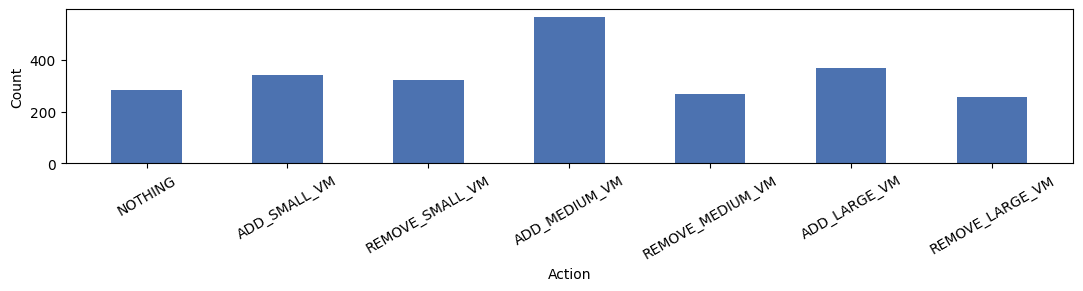

In [7]:
plot_action_histogram(predictions)

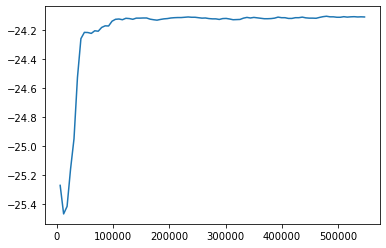

In [ ]:
df = parse_tensorboard(path=f'{BASE_PATH}/recurrentppo/MlpLstmPolicy/RecurrentPPO_18', scalars=['rollout/ep_rew_mean'])
plt.plot(df['rollout/ep_rew_mean']['step'], df['rollout/ep_rew_mean']['value'])

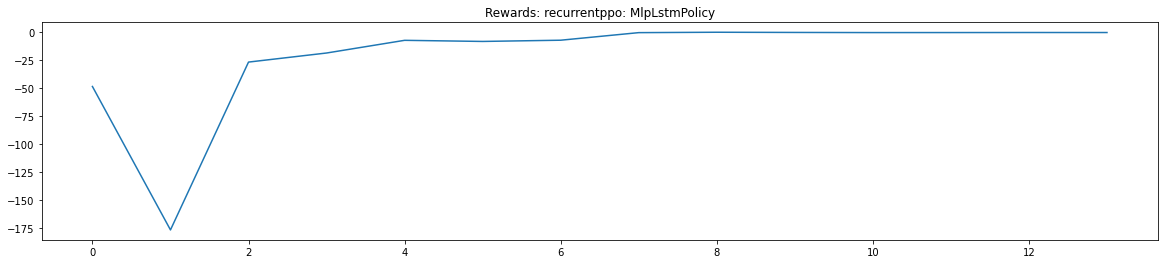

In [ ]:
plot_training_data(f'{BASE_PATH}/recurrentppo/MlpLstmPolicy/training_data.csv', data_type='reward', title='recurrentppo: MlpLstmPolicy')

# Attributions

In [8]:
from ppo_policy_2 import RecurrentPPOPolicy, RNNStates
ppo_net = RecurrentPPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [9]:
ppo_net.lstm_hidden_state_shape

(1, 1, 128)

In [10]:
x = torch.tensor(X[0])
# x = torch.tensor(X)
ppo_net.forward(
    x, 
    lstm_states=RNNStates(
        pi=(torch.zeros(ppo_net.lstm_hidden_state_shape), torch.zeros(ppo_net.lstm_hidden_state_shape)), 
        vf=(torch.zeros(ppo_net.lstm_hidden_state_shape), torch.zeros(ppo_net.lstm_hidden_state_shape))),
    episode_starts=torch.zeros(0))

c:\Users\ultramarine\.conda\envs\trainloop_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


(tensor([5]),
 tensor([[-0.7847]], grad_fn=<AddmmBackward0>),
 tensor([-1.8827], grad_fn=<SqueezeBackward1>),
 RNNStates(pi=(tensor([[[ 1.3506e-02,  1.0148e-02, -2.0847e-02,  2.1157e-02, -5.5742e-04,
            3.0631e-02,  7.4300e-03, -1.5114e-02,  1.5102e-02, -1.4802e-02,
            2.6492e-02,  2.1015e-02,  4.4250e-02,  2.1629e-02,  1.1406e-02,
           -1.5291e-02,  1.0926e-02, -2.2219e-02,  3.0473e-03, -2.9887e-02,
            1.6446e-02,  1.9123e-02, -3.7292e-02,  4.7678e-02, -2.4805e-02,
           -2.8338e-02,  2.2750e-02,  3.7746e-02,  2.9164e-02, -6.0069e-03,
           -1.6105e-02, -1.8673e-02,  3.4540e-03, -3.6255e-02, -3.4354e-05,
           -1.9394e-02,  2.8913e-02,  1.9049e-02,  4.5178e-02,  7.3983e-04,
            3.1783e-02, -2.5472e-02,  3.6407e-02, -7.2502e-03,  5.8897e-03,
            1.6232e-02, -5.3005e-03, -1.8106e-02, -1.5307e-02, -4.5028e-02,
            4.4357e-02,  1.2974e-02,  4.7754e-02, -4.2213e-03,  2.4878e-02,
            2.5435e-02, -1.8343e-02, -5.

In [11]:
x = torch.tensor(X[1])
ppo_net.predict(x)[0][0]

c:\Users\ultramarine\.conda\envs\trainloop_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


4

In [17]:
# for w in ppo_net.lstm_actor.all_weights[0]:
#     print(w.shape)

In [ ]:
# plot observations so you can choose which timeframe you want to analise

In [12]:
import torch
from captum.attr import IntegratedGradients
X_sample = X.numpy()  # shape [B, obs_dim]
B = X_sample.shape[0]                       # batch size
device = next(ppo_net.parameters()).device

obs = torch.as_tensor(X_sample, dtype=torch.float32, device=device)

# Properly shaped recurrent args
states = ppo_net.get_initial_lstm_states(batch_size=B, device=device)
episode_starts = torch.zeros(B, dtype=torch.bool, device=device)

# A forward that returns ONLY the value scalar per sample: [B]
def forward_values(obs_tensor, states_in, ep_starts):
    # features
    feats = ppo_net.extract_features(obs_tensor)
    # actor LSTM
    lat_pi, _ = ppo_net._process_sequence(feats, states_in.pi, ep_starts, ppo_net.lstm_actor)
    # critic path
    if ppo_net.lstm_critic is not None:
        lat_vf, _ = ppo_net._process_sequence(feats, states_in.vf, ep_starts, ppo_net.lstm_critic)
    elif ppo_net.shared_lstm:
        lat_vf = lat_pi.detach()
    else:
        lat_vf = ppo_net.critic(feats) if getattr(ppo_net, "critic", None) is not None else feats
    lat_vf = ppo_net.mlp_extractor.forward_critic(lat_vf)
    values = ppo_net.value_net(lat_vf).squeeze(-1)  # [B]
    return values

ig = IntegratedGradients(forward_values)

attr, delta = ig.attribute(
    inputs=obs,
    baselines=None,                      # or a baseline tensor of same shape
    additional_forward_args=(states, episode_starts),
    n_steps=50,
    return_convergence_delta=True,
)
actions = torch.as_tensor(predictions, device=device)
if actions.ndim == 1:
    # Categorical expects shape [B,] for log_prob
    pass

def forward_logprob_of_actions(obs_tensor, states_in, ep_starts, act):
    feats = ppo_net.extract_features(obs_tensor)
    lat_pi, _ = ppo_net._process_sequence(feats, states_in.pi, ep_starts, ppo_net.lstm_actor)
    lat_pi = ppo_net.mlp_extractor.forward_actor(lat_pi)
    dist = ppo_net._get_action_dist_from_latent(lat_pi)
    logp = dist.log_prob(act)            # [B]
    # If your action space is MultiDiscrete/Box, adapt shape accordingly
    return logp

ig = IntegratedGradients(forward_logprob_of_actions)

attr_pi, delta_pi = ig.attribute(
    inputs=obs,
    baselines=None,
    additional_forward_args=(states, episode_starts, actions),
    n_steps=50,
    return_convergence_delta=True,
)


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# --------- helpers ---------

def _to_2d(attr):
    """
    Normalize attribution shapes:
    - [B, N] -> [B, N]
    - [B, T, N] -> [B*T, N] (flatten time)
    - list/tuple of arrays -> stack along batch dim if shapes match
    """
    if isinstance(attr, (list, tuple)):
        attr = np.concatenate([np.asarray(a) for a in attr], axis=0)
    arr = np.asarray(attr)
    if arr.ndim == 2:
        return arr
    if arr.ndim == 3:
        B, T, N = arr.shape
        return arr.reshape(B * T, N)
    raise ValueError(f"Unsupported attribution shape {arr.shape}; expected [B,N] or [B,T,N]")

def summarize_attributions(attr, normalize=False):
    """
    Returns mean, std, and 95% CI across batch for each feature.
    If normalize=True, L1-normalizes each sample before averaging.
    """
    A = _to_2d(attr)  # [B', N]
    if normalize:
        denom = np.linalg.norm(A, ord=1, axis=1, keepdims=True) + 1e-12
        A = A / denom
    mean = A.mean(axis=0)
    std = A.std(axis=0, ddof=1) if A.shape[0] > 1 else np.zeros_like(mean)
    ci95 = 1.96 * std / np.sqrt(max(1, A.shape[0]))
    return mean, std, ci95

# --------- bar plot (signed, sorted by |mean|) ---------

def plot_feature_importance_bars(attr, feature_names=None, title="Attribution per feature",
                                 top_k=None, normalize=False, figsize=(8, 4), color_pos="#2ca02c", color_neg="#d62728"):
    """
    attr: numpy array of shape [B,N] or [B,T,N] (or list of arrays)
    feature_names: list of length N (optional)
    top_k: if set, only plot top_k features by |mean|
    normalize: if True, L1-normalize each sample before aggregation
    """
    mean, std, ci95 = summarize_attributions(attr, normalize=normalize)
    N = mean.shape[0]
    idx = np.argsort(-np.abs(mean))
    if top_k is not None:
        idx = idx[:top_k]

    mean_s = mean[idx]
    ci95_s = ci95[idx]
    names = [f"f{i}" for i in range(N)] if feature_names is None else [feature_names[i] for i in idx]

    x = np.arange(len(idx))
    colors = np.where(mean_s >= 0, color_pos, color_neg)

    plt.figure(figsize=figsize)
    bars = plt.bar(x, mean_s, yerr=ci95_s, capsize=3, color=colors, alpha=0.85)
    plt.axhline(0, color="k", linewidth=0.8)
    plt.xticks(x, names, rotation=45, ha="right")
    plt.ylabel("Attribution (mean ± 95% CI)")
    plt.title(title)
    # Add small labels on bars (optional)
    # for i, b in enumerate(bars):
    #     plt.text(b.get_x() + b.get_width()/2, b.get_height(), f"{mean_s[i]:.3f}", ha="center", va="bottom", fontsize=8)
    plt.tight_layout()
    plt.show()

# --------- heatmap per-sample (good to see variability) ---------

def plot_attribution_heatmap(attr, feature_names=None, title="Attribution heatmap (samples × features)",
                             normalize=False, sort_features_by_abs_mean=True, vmax=None, figsize=(8, 5)):
    """
    Shows a heatmap of attributions across samples (rows) and features (cols).
    """
    A = _to_2d(attr)  # [B', N]
    if normalize:
        denom = np.linalg.norm(A, ord=1, axis=1, keepdims=True) + 1e-12
        A = A / denom

    mean = A.mean(axis=0)
    if sort_features_by_abs_mean:
        col_idx = np.argsort(-np.abs(mean))
        A = A[:, col_idx]
    else:
        col_idx = np.arange(A.shape[1])

    names = [f"f{i}" for i in col_idx] if feature_names is None else [feature_names[i] for i in col_idx]

    plt.figure(figsize=figsize)
    vmax_auto = np.percentile(np.abs(A), 99) if vmax is None else vmax
    plt.imshow(A, aspect="auto", cmap="bwr", vmin=-vmax_auto, vmax=vmax_auto)
    plt.colorbar(label="Attribution")
    plt.xlabel("Features")
    plt.ylabel("Samples")
    plt.title(title)
    plt.xticks(np.arange(len(names)), names, rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# --------- example usage ---------
# Suppose you have:
# attributions: np.ndarray of shape [B, N] (e.g., from IG on values or log-probs)
# feature_names: list[str] length N (optional)

# plot top-7 (all) features as signed bars:
plot_feature_importance_bars(attr, feature_names=Utils.FEATURE_NAMES, top_k=None,
                             normalize=False, title="Value IG (mean per feature)")




NameError: name 'attr' is not defined

In [12]:
# Random samples
N = 1000
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# Sequential samples
# i_start = 0
# i_stop = 500
# X_sample = X[i_start:i_stop]
# predictions_sample = predictions[i_start:i_stop]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample,
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                #pi=(torch.zeros(1, 1, 64), torch.zeros(1, 1, 64)), 
                #vf=(torch.zeros(1, 1, 64), torch.zeros(1, 1, 64))),
                    torch.zeros(0)))

# Mean Attributions

In [30]:

mean_attributions_per_action = ig_attributor.get_mean_attributions()

In [31]:
mean_attributions_per_action = [action_att.sum(0) / np.linalg.norm(action_att.sum(0), ord=1) for action_att in ig_attributor.attributions]

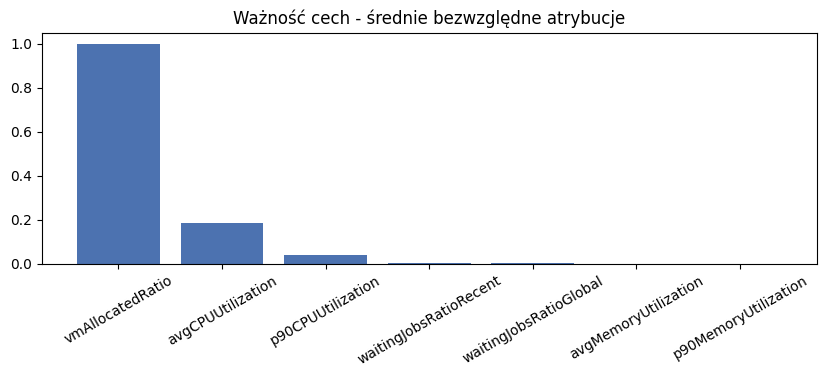

In [32]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)

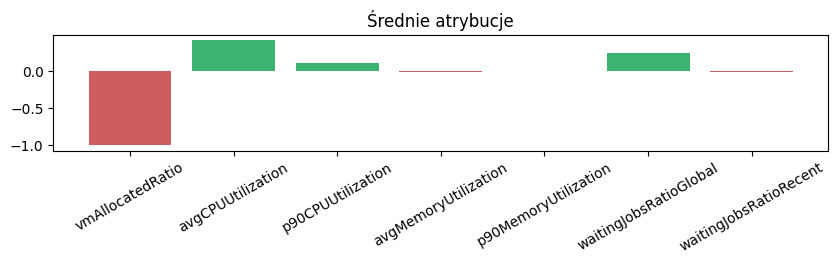

In [16]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0])

# Attributions for examples

1


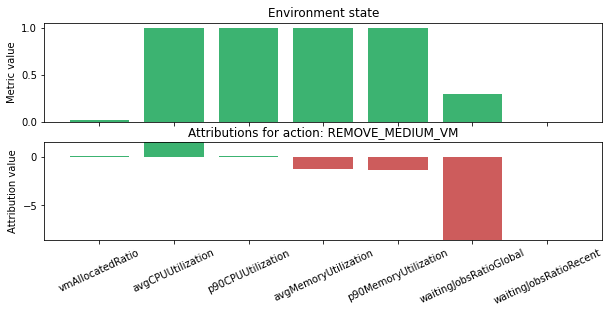

In [34]:
ig_attributor.explain_example(0)

In [26]:
action_observation_map = get_action_observation_map(predictions)

Observation count for each action:
{'ADD_LARGE_VM': 2560,
 'ADD_MEDIUM_VM': 2326,
 'ADD_SMALL_VM': 2316,
 'NOTHING': 1519,
 'REMOVE_LARGE_VM': 950,
 'REMOVE_MEDIUM_VM': 1040,
 'REMOVE_SMALL_VM': 1081}


In [28]:
idx = action_observation_map['REMOVE_LARGE_VM'].squeeze(1)[:300]

In [29]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X[idx],
                            predictions=predictions[idx],
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

Action made: REMOVE_LARGE_VM


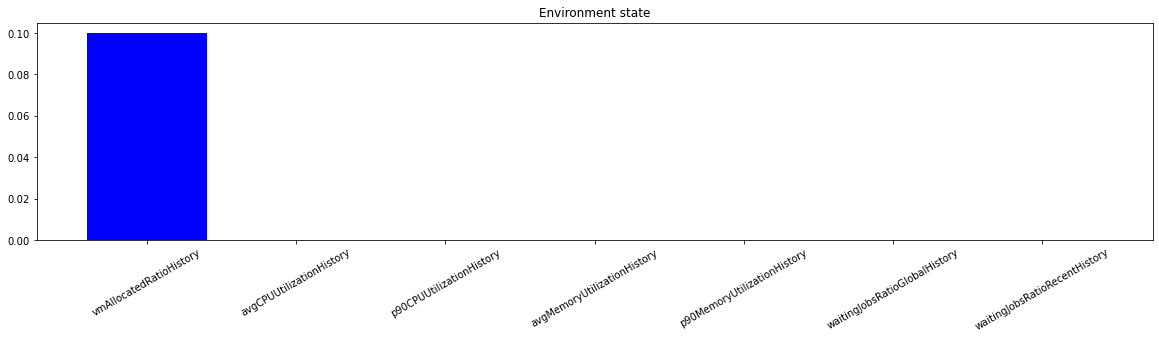

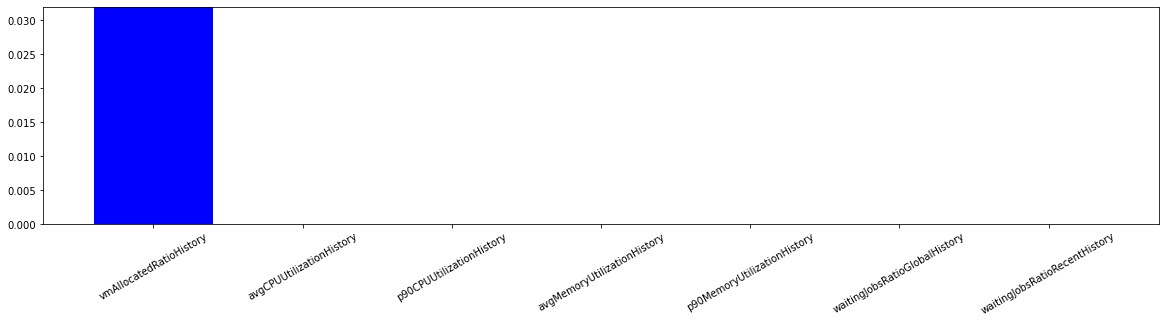

In [30]:
ig_attributor.explain_example(idx=0)

Action made: REMOVE_LARGE_VM


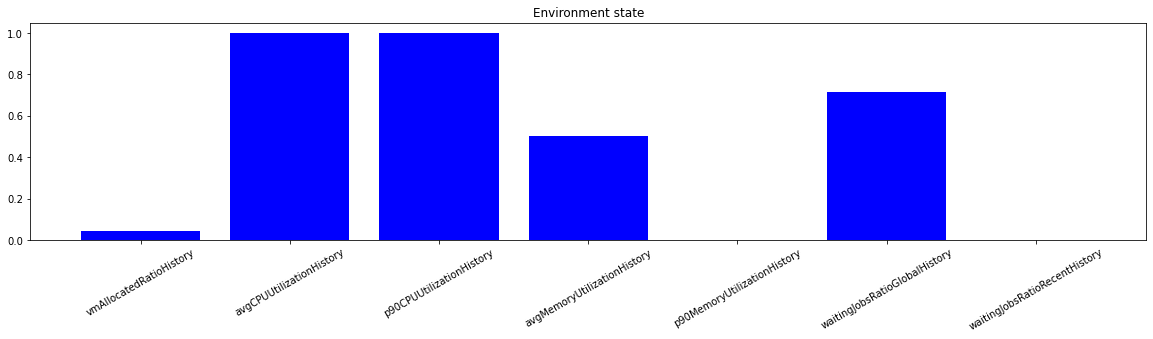

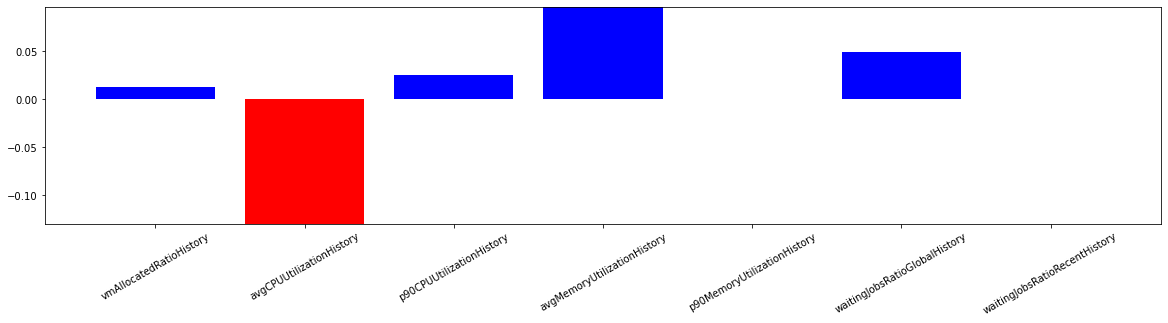

In [32]:
ig_attributor.explain_example(idx=10)

Action made: REMOVE_LARGE_VM


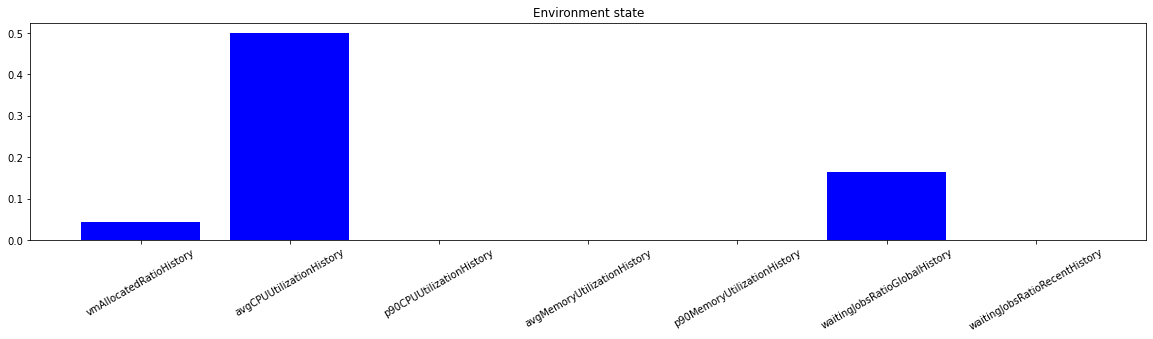

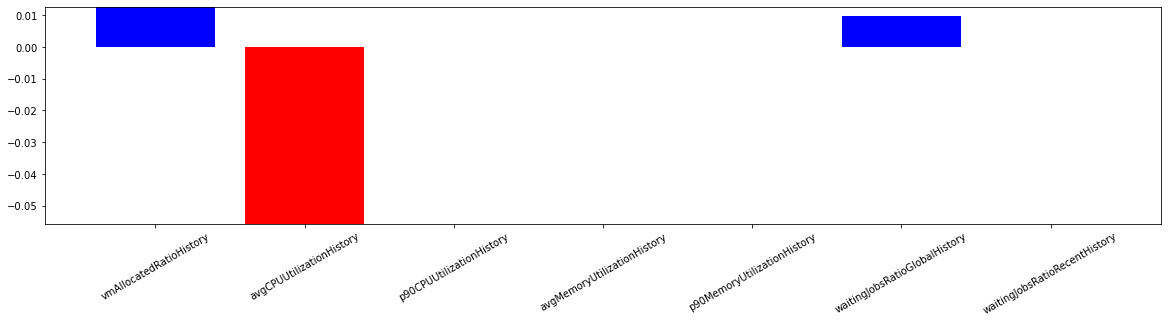

In [35]:
ig_attributor.explain_example(idx=50)

In [19]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0, 1, 1, 0, 0, 1, 1]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])
predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [20]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_manual,
                            predictions=predictions_manual,
                            forward_args=(RNNStates(
                    pi=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256)), 
                    vf=(torch.zeros(1, 1, 256), torch.zeros(1, 1, 256))),
                    torch.zeros(0)))

Action made: NOTHING


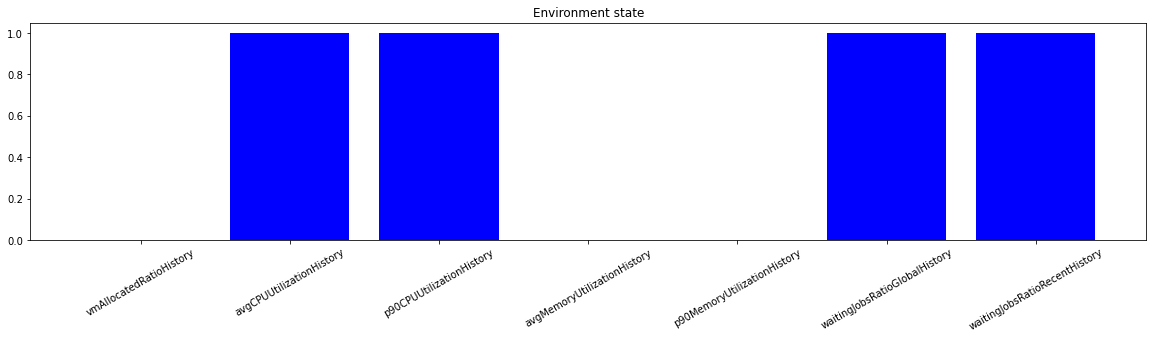

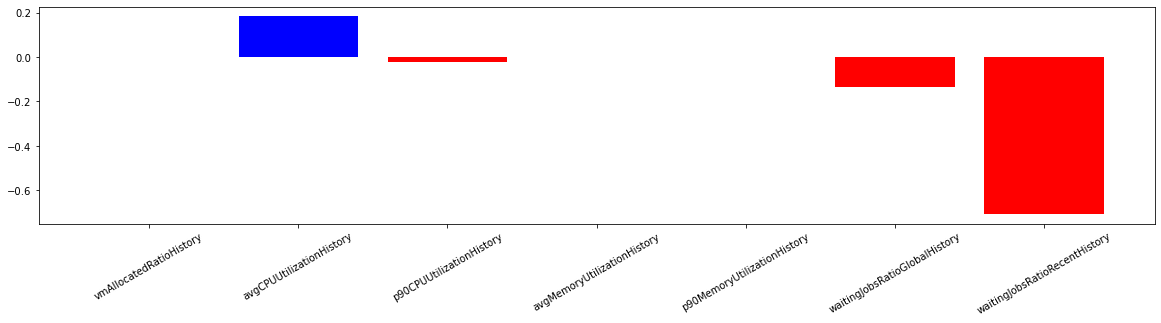

In [21]:
ig_attributor.explain_example(idx=2)

Action made: NOTHING


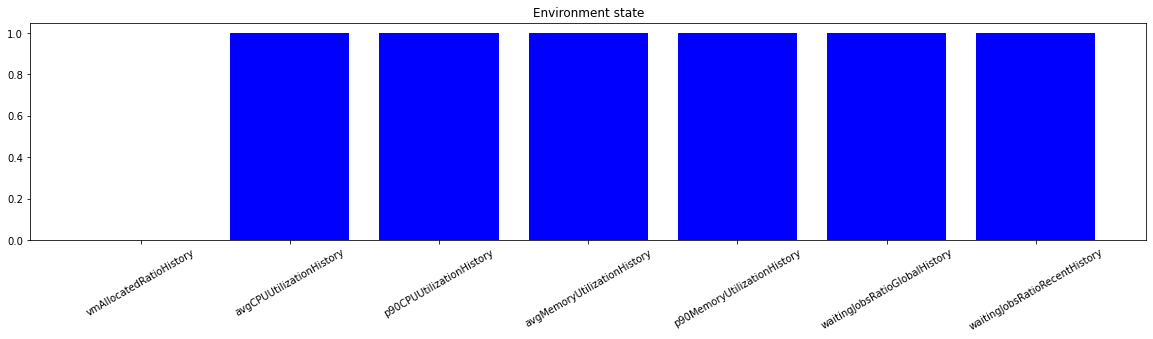

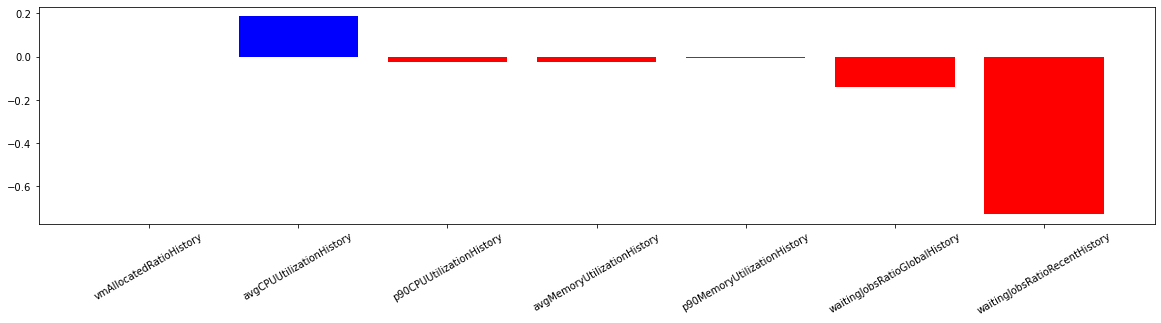

In [22]:
ig_attributor.explain_example(idx=0)